# **Customer Segmentation**

Recency, Frequency, Monetary (RFM) Analysis
Customer segmentation is a crucial marketing tool that allows businesses to understand their target audience better. By segmenting customers, businesses can gain insights into their behaviors and tailor marketing efforts and communications more effectively for each segment.

**What is RFM Analysis?**

RFM analysis is a technique used to segment customers based on three key factors:

**Recency (R):** How recently a customer made their last purchase. This is measured by the difference between the date of their last purchase and the current date.

**Frequency (F):** How often a customer makes a purchase. This counts the total number of transactions made by each customer.

**Monetary (M):** How much a customer has spent. This measures the total spending of each customer over a specific period.

By evaluating these three factors, businesses can categorize customers into segments, enabling more personalized marketing strategies and customer relationship management.

In [ ]:
import pandas as pd
import plotly.express as px
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r"/content/cleaned_df.csv")

In [ ]:
df

,order_id,customer_id,customer_unique_id,order_purchase_date,order_status,order_estimated_delivery_date,order_delivered_customer_date,total_payment_value,total_installments,payment_types,...,product_category_name_english,seller_id,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_creation_date,delivery_time,estimated_delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,delivered,2017-10-18,2017-10-10 21:25:13,38.71,3.0,credit_card+voucher,...,housewares,3504c0cb71d7fa48d967e0e4c94d59d9,9350.0,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11,8.0,15.0
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,delivered,2017-12-15,2017-12-02 00:28:42,72.20,1.0,credit_card,...,pet_shop,66922902710d126a0e7d26b0e3805106,31842.0,belo horizonte,MG,359d03e676b3c069f62cadba8dd3f6e8,5.0,2017-12-03,13.0,26.0
2,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,delivered,2018-02-26,2018-02-16 18:17:02,28.62,1.0,credit_card,...,stationery,2c9e548be18521d1c43cde1c582c6de8,8752.0,mogi das cruzes,SP,e50934924e227544ba8246aeb3770dd4,5.0,2018-02-17,2.0,12.0
3,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,80bb27c7c16e8f973207a5086ab329e2,2017-07-09 21:57:05,delivered,2017-08-01,2017-07-26 10:57:55,175.26,6.0,credit_card,...,auto,8581055ce74af1daba164fdbd55a40de,7112.0,guarulhos,SP,89b738e70a1ce346db29a20fb2910161,4.0,2017-07-27,16.0,22.0
4,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,36edbb3fb164b1f16485364b6fb04c73,2017-04-11 12:22:08,invoiced,2017-05-09,2017-05-09 00:00:00,65.95,1.0,credit_card,...,Unknown,dc8798cbf453b7e0f98745e396cc5616,5455.0,sao paulo,SP,e07549ef5311abcc92ba1784b093fb56,2.0,2017-05-13,27.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71586,de043cb17ef1ed9caf701f28478dfdfb,de896fd50d3dc50189c151961744b66c,67da8e06203a3c44fd5b33c8e01b683c,2017-11-14 22:54:31,delivered,2017-12-04,2017-11-20 22:03:02,21.75,2.0,credit_card,...,telephony,f27e33c6d29b5138fa9967bcd445b6d5,4273.0,sao paulo,SP,3b97107dae9c081922c1bd0cf4580bb0,5.0,2017-11-21,5.0,19.0
71587,83a8c8477a4beb1799eeff411ab29c0b,0e4ecac582d45f4fe67305137a662cbc,220bcdd6ae284ed1a273d99003fa8a0e,2018-04-01 20:02:24,delivered,2018-04-12,2018-04-03 14:56:32,37.38,3.0,credit_card,...,telephony,2138ccb85b11a4ec1e37afbd1c8eda1f,8250.0,sao paulo,SP,ef704230a3b5a0261d95ee3c793b8668,5.0,2018-04-04,1.0,10.0
71588,b93dfded1655914b88fb6ae621fb62f1,42be86d23d5fc12768d90a1eaa83872f,3af45fe3c1c22f5b1a03de0637741bc6,2017-11-06 15:02:56,delivered,2017-11-27,2017-11-13 16:36:28,102.18,2.0,credit_card,...,furniture_decor,1025f0e2d44d7041d6cf58b6550e0bfa,3204.0,sao paulo,SP,9df5cc585bc725ce1ca20644039f13f2,5.0,2017-11-14,7.0,20.0
71589,fd51ddbb6f83516cd9c97d7a5de5e796,204abc77cec3e0675c696adea8229909,8c045269039491798a2285c1adcbe026,2018-05-14 09:29:19,delivered,2018-05-30,2018-05-18 17:56:45,89.60,3.0,credit_card,...,sports_leisure,54a1852d1b8f10312c55e906355666ee,13456.0,santa barbara d'oeste,SP,bf995a1a18ee041af7d738304bfd9880,5.0,2018-05-19,4.0,15.0


In [ ]:
df.dtypes

,0
order_id,object
customer_id,object
customer_unique_id,object
order_purchase_date,object
order_status,object
order_estimated_delivery_date,object
order_delivered_customer_date,object
total_payment_value,float64
total_installments,float64
payment_types,object


In [ ]:
# Handle any non-standard formats and convert to datetime
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_purchase_date'] = pd.to_datetime(df['order_purchase_date'])

In [ ]:
df.dtypes

,0
order_id,object
customer_id,object
customer_unique_id,object
order_purchase_date,datetime64[ns]
order_status,object
order_estimated_delivery_date,datetime64[ns]
order_delivered_customer_date,datetime64[ns]
total_payment_value,float64
total_installments,float64
payment_types,object


In [ ]:
# get our last order transaction
last= df['order_purchase_date'].max()
last

Timestamp('2018-06-30 23:59:49')

In [ ]:
#observed day = + 1 days since last transactions
timebound = last + timedelta(days=1)
timebound

Timestamp('2018-07-01 23:59:49')

In [ ]:
# total unique customer id
df['customer_unique_id'].nunique()

67219

In [ ]:
#calculate RFM metrics
df_rfm = df.groupby('customer_unique_id').agg({
    'order_purchase_date' : lambda x : (timebound- x.max()).days,
    'order_id' : 'nunique',
    'total_payment_value' : 'sum'})

In [ ]:
#rename the column for easy interpretation
df_rfm.reset_index(inplace=True)
df_rfm.rename(columns= {'order_purchase_date': 'Recency',
                        'order_id': 'Frequency',
                        'total_payment_value': 'Monetary Value'},inplace= True)

In [ ]:
df_rfm

,customer_unique_id,Recency,Frequency,Monetary Value
0,0000366f3b9a7992bf8c76cfdf3221e2,52,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,55,1,27.19
2,0000f46a3911fa3c0805444483337064,478,1,86.22
3,0004aac84e0df4da2b147fca70cf8255,229,1,196.89
4,0004bd2a26a76fe21f786e4fbd80607f,87,1,166.98
...,...,...,...,...
67214,fffbf87b7a1a6fa8b03f081c5f51a201,186,1,167.32
67215,fffcc512b7dfecaffd80f13614af1d16,81,1,710.70
67216,fffea47cd6d3cc0a88bd621562a9d061,203,1,84.58
67217,ffff371b4d645b6ecea244b27531430a,509,1,112.46


In [ ]:
rfm= df_rfm[['Recency', 'Frequency', 'Monetary Value']]
rfm

,Recency,Frequency,Monetary Value
0,52,1,141.90
1,55,1,27.19
2,478,1,86.22
3,229,1,196.89
4,87,1,166.98
...,...,...,...
67214,186,1,167.32
67215,81,1,710.70
67216,203,1,84.58
67217,509,1,112.46


<Axes: xlabel='Recency', ylabel='Monetary Value'>

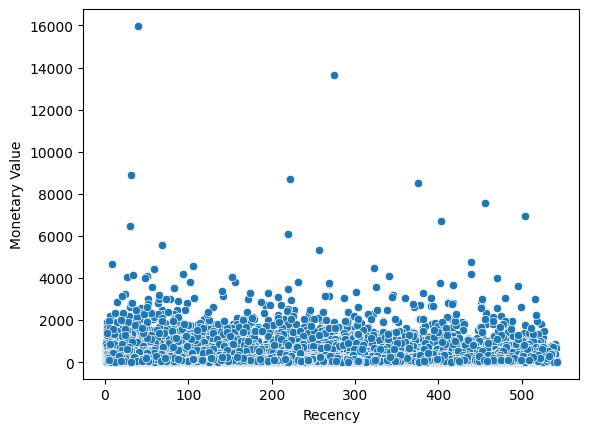

In [ ]:
sns.scatterplot(rfm, x ="Recency",y= 'Monetary Value' )

In [ ]:
rfm1= rfm.copy()
rfm1

,Recency,Frequency,Monetary Value
0,52,1,141.90
1,55,1,27.19
2,478,1,86.22
3,229,1,196.89
4,87,1,166.98
...,...,...,...
67214,186,1,167.32
67215,81,1,710.70
67216,203,1,84.58
67217,509,1,112.46


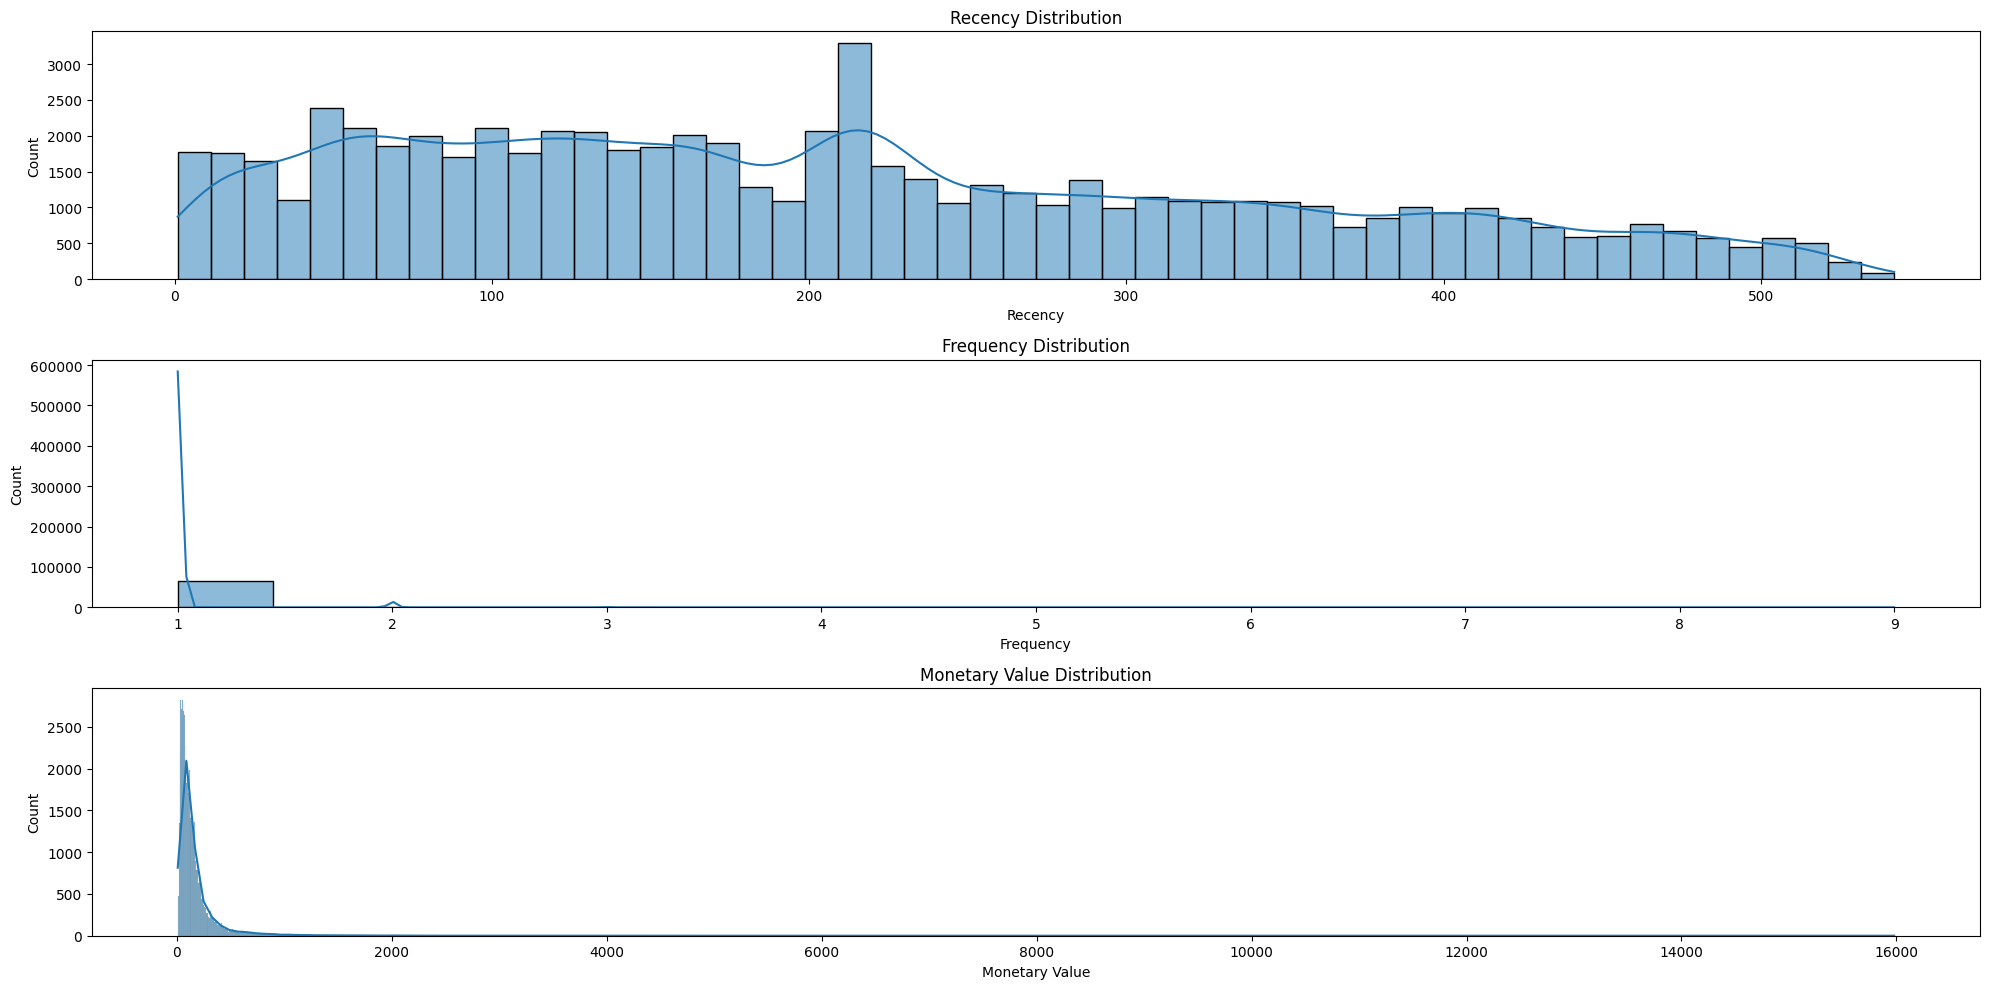

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10))

# Plotting Recency distribution
sns.histplot(rfm1['Recency'], kde=True, ax=axes[0])
axes[0].set_title('Recency Distribution')

# Plotting Frequency distribution
sns.histplot(rfm1['Frequency'], kde=True, ax=axes[1])
axes[1].set_title('Frequency Distribution')

# Plotting Monetary Value distribution
sns.histplot(rfm1['Monetary Value'], kde=True, ax=axes[2])
axes[2].set_title('Monetary Value Distribution')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
#unskew the data with data transformations
rfm1['Monetary Value']= np.log(rfm1['Monetary Value'])

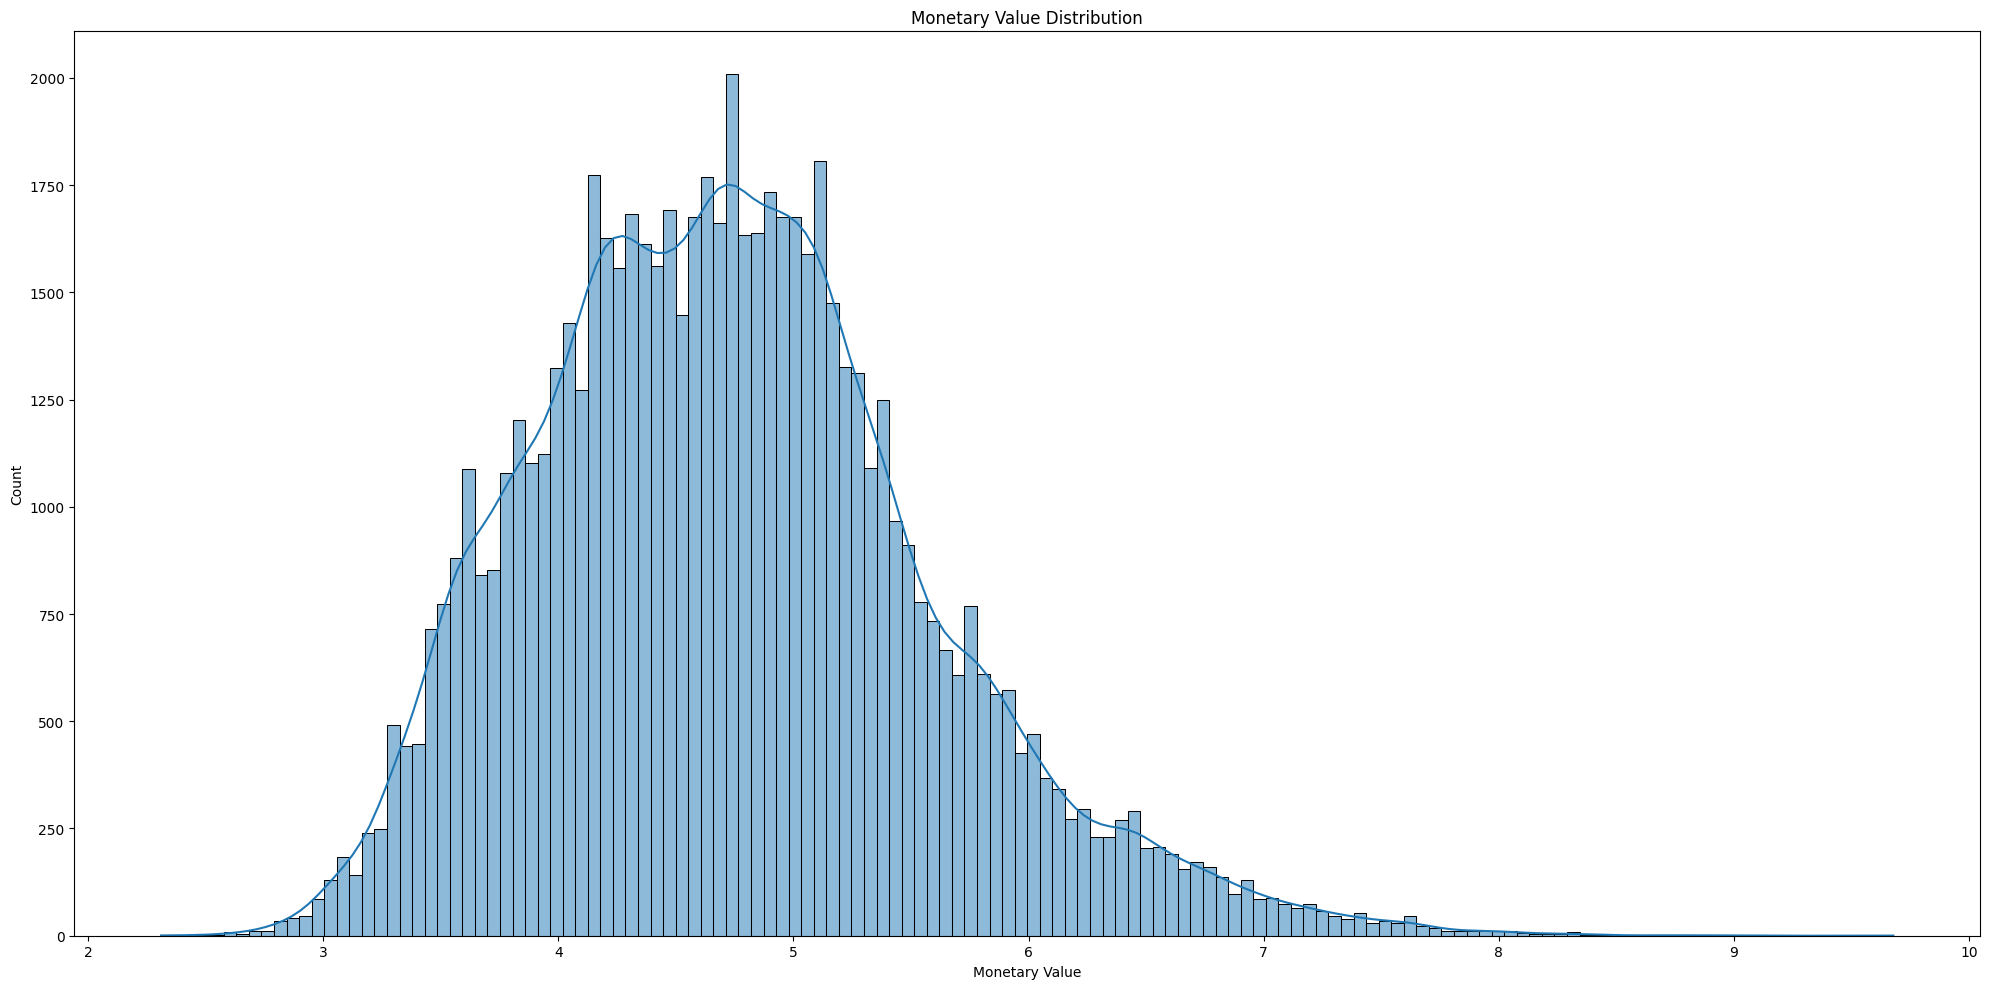

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

# Plotting Monetary Value distribution
sns.histplot(rfm1['Monetary Value'], kde=True, ax=ax)
ax.set_title('Monetary Value Distribution')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
rfm1

,Recency,Frequency,Monetary Value
0,52,1,4.955123
1,55,1,3.302849
2,478,1,4.456902
3,229,1,5.282645
4,87,1,5.117874
...,...,...,...
67214,186,1,5.119908
67215,81,1,6.566250
67216,203,1,4.437698
67217,509,1,4.722598


In [ ]:
# copy of log transformation
df_log = rfm1.copy()


In [ ]:
#using StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_log)
#normalize the variables
df_normalized = scaler.transform(df_log)

In [ ]:
# store for clustering
df_normalized = pd.DataFrame(data= df_normalized, index= rfm1.index, columns = rfm1.columns)
df_normalized

,Recency,Frequency,Monetary Value
0,-1.152632,-0.148026,0.258878
1,-1.130719,-0.148026,-1.705353
2,1.959065,-0.148026,-0.333409
3,0.140256,-0.148026,0.648239
4,-0.896976,-0.148026,0.452358
...,...,...,...
67214,-0.173835,-0.148026,0.454776
67215,-0.940803,-0.148026,2.174195
67216,-0.049660,-0.148026,-0.356239
67217,2.185503,-0.148026,-0.017549


To determine clusters we will use :

Elbow Method


# **Elbow Method**

In [ ]:
#Fit k-means and calculate SSE for eack k
wcss= {}
for k in range(1,7):
  kmeans= KMeans(n_clusters=k,init= "k-means++")
  kmeans.fit(df_normalized)
  wcss[k] = kmeans.inertia_

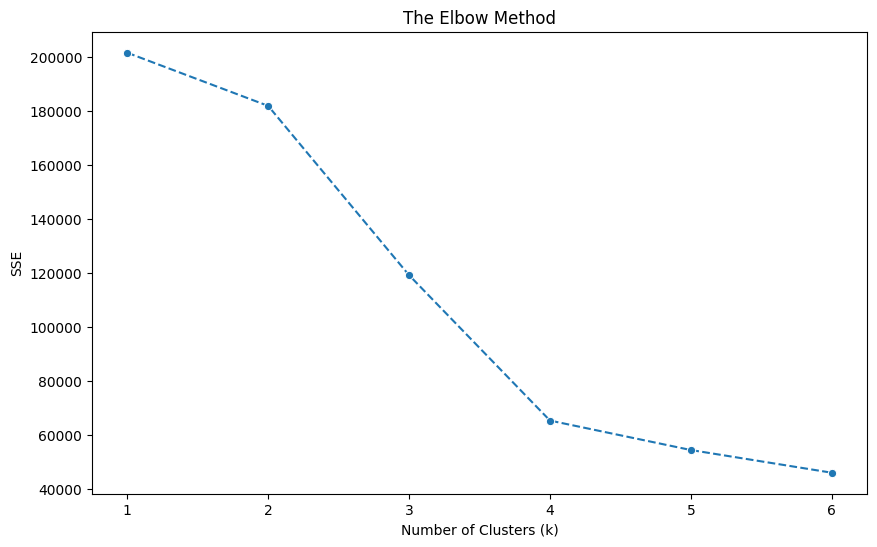

{1: 201657.00000000096, 2: 181972.0267810273, 3: 119283.08430211012, 4: 65454.1736073998, 5: 54546.19613653318, 6: 46143.48191416738}


In [ ]:
# Create a DataFrame from the SSE dictionary
sse_df = pd.DataFrame({
    'Number of Clusters': list(wcss.keys()),
    'SSE': list(wcss.values())
})

# Plot SSE for each k using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=sse_df, x='Number of Clusters', y='SSE', marker='o', linestyle='--')

# Customize plot
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.xticks(ticks=sse_df['Number of Clusters'])  # Ensure all k values are shown on x-axis

# Show the plot
plt.show()

# Print the SSE values
print(wcss)

In [ ]:
!pip install kneed

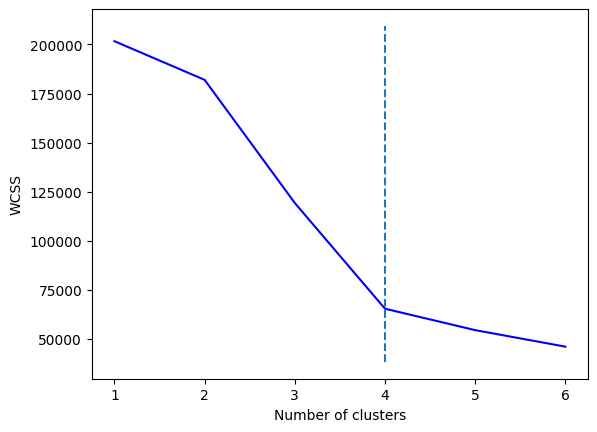

In [ ]:
from kneed import KneeLocator
# Extract keys and values
x = list(wcss.keys())
y = list(wcss.values())

# Create the KneeLocator instance
kl = KneeLocator(x, y, curve="convex", direction="decreasing")

# Plot the results to check
plt.plot(x, y, 'b-')
plt.vlines(kl.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kl.elbow

np.int64(4)

# **Elbow Method for Determining Optimal Clusters**

The plot above illustrates the Sum of Squared Errors (SSE) for different numbers of clusters. As the number of clusters increases, the SSE decreases, indicating improved clustering. The "elbow" point, where the rate of decrease slows significantly, suggests the optimal number of clusters.

 Based on the plot:

**3 Clusters:** Provides a good balance between reducing SSE and maintaining simplicity.

**4 Clusters:** Offers slightly more granularity with diminished additional improvements in SSE.
Choosing between 3 and 4 clusters depends on the desired balance between model simplicity and detail.

# **Applying K-Means Clustering**

In [ ]:
kmeans = KMeans(n_clusters=3,random_state= 5)
kmeans.fit(df_normalized)
cluster_labels = kmeans.labels_

In [ ]:
len(cluster_labels)

67219

In [ ]:
len(df_rfm)

67219

In [ ]:
#assign the label to raw data
df_rfm['Cluster'] = cluster_labels

In [ ]:
df_rfm

,customer_unique_id,Recency,Frequency,Monetary Value,Cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,52,1,141.90,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,55,1,27.19,0
2,0000f46a3911fa3c0805444483337064,478,1,86.22,1
3,0004aac84e0df4da2b147fca70cf8255,229,1,196.89,0
4,0004bd2a26a76fe21f786e4fbd80607f,87,1,166.98,0
...,...,...,...,...,...
67214,fffbf87b7a1a6fa8b03f081c5f51a201,186,1,167.32,0
67215,fffcc512b7dfecaffd80f13614af1d16,81,1,710.70,2
67216,fffea47cd6d3cc0a88bd621562a9d061,203,1,84.58,0
67217,ffff371b4d645b6ecea244b27531430a,509,1,112.46,1


In [ ]:
fig = px.scatter(df_rfm, x='Recency', y='Monetary Value', color='Cluster',
                 title='Customer Segmentation based on RFM Analysis',
                 labels={'Recency': 'Recency (Days)', 'Monetary Value': 'Monetary Value'})

fig.update_traces(marker=dict(size=10, opacity=0.7))
fig.show()

In [ ]:
result = df_rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary Value']].agg(['mean', 'median'])
result

Recency        Frequency        Monetary Value        
               mean median      mean median           mean  median
Cluster                                                           
0        122.207782  121.0  1.000000    1.0     101.284567   89.88
1        370.932368  363.0  1.000189    1.0     119.786766   97.08
2        180.406691  171.0  1.172969    1.0     528.033398  374.35

# **Customer Segmentation Based on RFM Analysis**

**Cluster 0:** Recent Low Spenders

**Recency:** Customers have purchased recently.

**Frequency:** Customers purchase infrequently.

**Monetary Value:** Customers spend relatively less.

**Cluster 1:** Frequent High Spenders

**Recency:** Customers have not purchased recently.

**Frequency:** Customers make frequent purchases.

Monetary Value: Customers spend a lot.

**Cluster 2:** Inactive Low Spenders

**Recency:**Customers have not purchased in a long time.

**Frequency:** Customers purchase infrequently.

**Monetary Value:** Customers spend relatively less.